In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Converting from homogenous coordinates in himomogenous coordinate  

In [3]:
def hom_to_inhom(arr: np.array) -> np.array:
    return arr[:-1]/arr[-1]

### Exercise 1.1

In [4]:
p1 = np.array([1, 2, 1])
p2 = np.array([4, 2, 2])
p3 = np.array([6, 4, -1])
p4 = np.array([5, 3, .5])
hom_to_inhom(p1), hom_to_inhom(p2), hom_to_inhom(p3), hom_to_inhom(p4)

(array([1., 2.]), array([2., 1.]), array([-6., -4.]), array([10.,  6.]))

### Exercise 2.2
Transform 

In [5]:
points = {
    "p1": np.array([1, 10, -3, 1]),
    "p2": np.array([2,-4, 1.1, 2]),
    "p3": np.array([0, 0,-1, 10]),
    "p4": np.array([-15, 3, 6, 3]),
}
for k, p in points.items():
    print(f"{k} hom: {p}, inhom: {hom_to_inhom(p)}")

p1 hom: [ 1 10 -3  1], inhom: [ 1. 10. -3.]
p2 hom: [ 2.  -4.   1.1  2. ], inhom: [ 1.   -2.    0.55]
p3 hom: [ 0  0 -1 10], inhom: [ 0.   0.  -0.1]
p4 hom: [-15   3   6   3], inhom: [-5.  1.  2.]


### Exercise 1.3
Transform line to homogenous form

Line in new form is given by

$0 = \begin{bmatrix} 1 \\ 2 \\ -3 \end{bmatrix} \cdot \begin{bmatrix} sx \\ sy \\ s\end{bmatrix}$

### Exercise 1.4
Point on line?

In [6]:
l = np.array([1, 2, -3])
points = {
    "p1": np.array([3, 0, 1]),
    "p2": np.array([6, 0, 2]),
    "p3": np.array([1, 1, 2]),
    "p4": np.array([1, 1, 1]),
    "p5": np.array([110, -40, 10]),
    "p6": np.array([11, 4, 1]),
}

for k, p in points.items():
    print(f"{k}, on line = {l @ p == 0}, val: {l @ p}")

p1, on line = True, val: 0
p2, on line = True, val: 0
p3, on line = False, val: -3
p4, on line = True, val: 0
p5, on line = True, val: 0
p6, on line = False, val: 16


### Exercise 1.5

In [7]:
l0 = np.array([1, 1, -1])
l1 = np.array([-1, 1, -3])
np.cross(l0, l1)

array([-2,  4,  2])

### Exercise 1.6
Explanation of A
$A = \begin{bmatrix} 10 & 0 & 2 \\ 0 & 10 & -3 \\ 0 & 0 & 1 \end{bmatrix} = \begin{bmatrix} 10 & 0 & 2 \\ 0 & 10 & -3 \\ 0 & 0 & 1 \end{bmatrix} $

array([ 1, -4,  0])

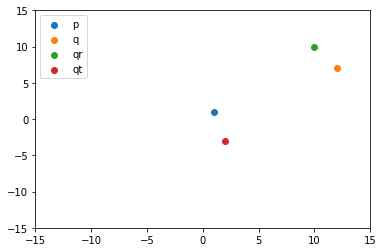

In [8]:
A = np.array([[10, 0, 2], [0, 10, -3], [0, 0, 1]])
Ar = np.array([[10, 0, 0], [0, 10, 0], [0, 0, 1]])
At = np.array([[0, 0, 2], [0, 0, -3], [0, 0, 1]])
p = np.array([1, 1, 1])
q = A @ p
qr = Ar @ p
qt = At @ p
plt.scatter(p[0], p[1])
plt.scatter(q[0], q[1])
plt.scatter(qr[0], qr[1])
plt.scatter(qt[0], qt[1])
plt.legend(["p", "q", "qr", "qt"])
plt.xlim(-15, 15)
plt.ylim(-15, 15)

qt - p

In [9]:
A @ p

array([12,  7,  1])

### Exercise 1.7

In [10]:
l = np.array([1/np.sqrt(2),1/np.sqrt(2), -1])
points = [
    np.array([0, 0, 1]),
    np.array([np.sqrt(2), np.sqrt(2), 1]),
    np.array([np.sqrt(2), np.sqrt(2), 4]),
]
for p in points:
    print(l @ p)

-1.0
1.0
-2.0


### Exercise 1.8
Didn't make same solution

### Exercise 1.9

In [11]:
import cv2

(3072, 4096, 3)

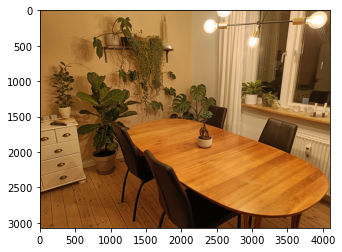

In [12]:
img = cv2.imread("img.jpg")
new_img = img[:,:, [2, 1, 0]]
plt.imshow(new_img[:, :, :])
img.shape

### Exercise 1.11

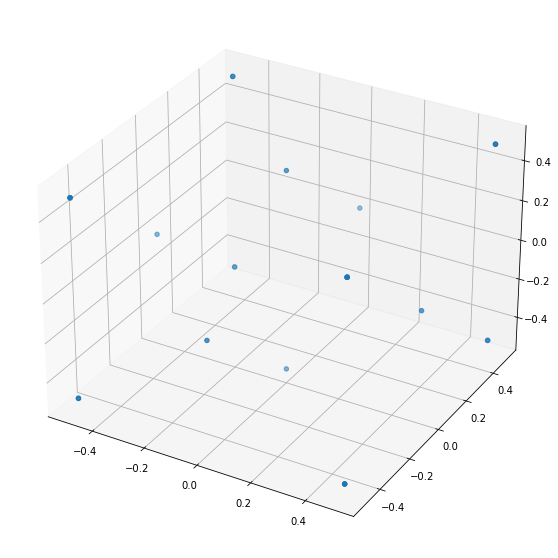

In [35]:
def box3d(n: int) -> np.array:
    l = np.linspace(-.5, .5, n)
    ones = np.zeros(n)

    box = np.array([l, ones, ones])
    box = np.append(box, [l, ones-.5, ones-.5], axis=1)
    box = np.append(box, [l, ones-.5, ones+.5], axis=1)
    box = np.append(box, [l, ones+.5, ones+.5], axis=1)
    box = np.append(box, [l, ones+.5, ones-.5], axis=1)

    box = np.append(box, [ones, l, ones], axis=1)
    box = np.append(box, [ones-.5, l, ones-.5], axis=1)
    box = np.append(box, [ones-.5, l, ones+.5], axis=1)
    box = np.append(box, [ones+.5, l, ones+.5], axis=1)
    box = np.append(box, [ones+.5, l, ones-.5], axis=1)

    box = np.append(box, [ones, ones, l], axis=1)
    box = np.append(box, [ones-.5, ones-.5, l], axis=1)
    box = np.append(box, [ones-.5, ones+.5, l], axis=1)
    box = np.append(box, [ones+.5, ones+.5, l], axis=1)
    box = np.append(box, [ones+.5, ones-.5, l], axis=1)

    return box
box = box3d(2)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
ax.scatter(box[0], box[1], box[2])
plt.show()

### Exercise 1.12

(3, 240) (3, 240)
[ 0.5 -0.5  4.5]


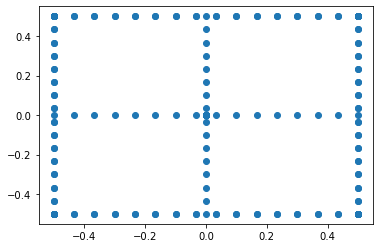

In [114]:
box = box3d(16)

def projectpoints(K: np.array, R: np.array, t: np.array, Q: np.array):
    t = t.reshape(len(t), 1)
    Rt = np.append(R, t, axis=1)
    P = K @ Rt
    Qh = np.append(Q, np.ones((1, Q.shape[1])), axis=0)
    return P @ Qh

K = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
R = K.copy()
t = np.array([0, 0, 4])

projected = projectpoints(K, R, t, box)
print(box.shape, projected.shape)
print(projected[:, -1])
plt.scatter(projected[0], projected[1])

### Exercise 1.13

(3, 240) (3, 240)
[0.57922797 0.         3.40557979]


(-0.5, 0.5)

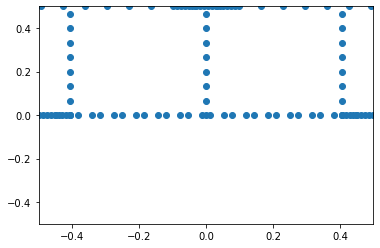

In [134]:
K = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
theta = 10
R = np.array([
    [np.cos(np.deg2rad(theta)), 0, np.sin(np.deg2rad(theta))],
    [0, 1, 0],
    [-np.sin(np.deg2rad(theta)), 0, np.cos(np.deg2rad(theta))]
])
t = np.array([0, .5, 3])

projected = projectpoints(K, R, t, box)
print(box.shape, projected.shape)
print(projected[:, -1])
plt.scatter(projected[0], projected[1])
plt.xlim(-.5, .5)
plt.ylim(-.5, .5)